<a href="https://colab.research.google.com/github/Naitik582/oibsip_tasno-Level-1-Project-4-_Dataset-2/blob/main/Play_Store_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apps.csv to apps.csv


In [4]:
import pandas as pd

df = pd.read_csv('apps.csv')

df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (9659, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [7]:
def get_sentiment(rating):
    if rating >= 4.0:
        return 1
    elif rating >= 3.0:
        return 0
    else:
        return -1

df['Sentiment'] = df['Rating'].apply(get_sentiment)

df['Sentiment'].value_counts()

,count
Sentiment,
1,5291
0,1460
-1,270


In [8]:
import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)


df['Clean_App'] = df['App'].apply(clean_text)


df[['App', 'Clean_App']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,App,Clean_App
0,Photo Editor & Candy Camera & Grid & ScrapBook,photo editor candy camera grid scrapbook
1,Coloring book moana,coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",u launcher lite – free live cool themes hide apps
3,Sketch - Draw & Paint,sketch draw paint
4,Pixel Draw - Number Art Coloring Book,pixel draw number art coloring book


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)

X = vectorizer.fit_transform(df['Clean_App'])

y = df['Sentiment']

print("Feature Matrix Shape:", X.shape)

Feature Matrix Shape: (7021, 500)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7437722419928826

Confusion Matrix:
 [[   0    6   42]
 [   0   22  285]
 [   0   27 1023]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        48
           0       0.40      0.07      0.12       307
           1       0.76      0.97      0.85      1050

    accuracy                           0.74      1405
   macro avg       0.39      0.35      0.32      1405
weighted avg       0.65      0.74      0.66      1405



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


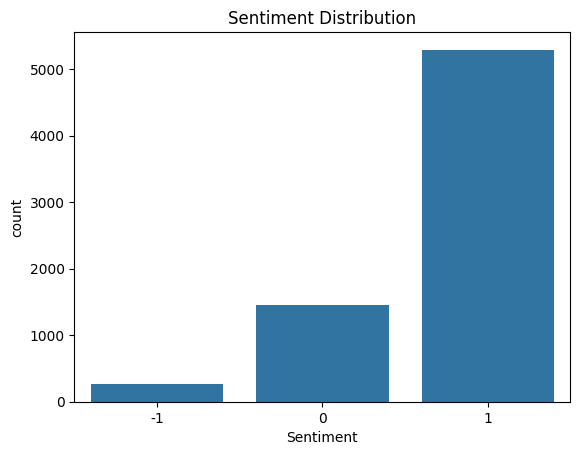

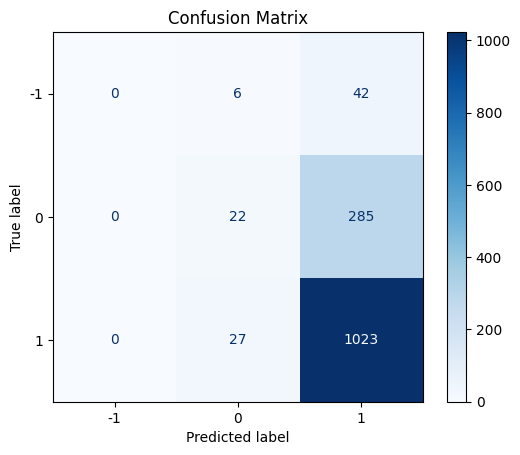

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()